In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

In [456]:
# Loading the data including features from local files.
df = pd.read_csv('/Users/jdobrow/Desktop/Data Science/Capstone 3 Files/df')
df.drop('Unnamed: 0', 1, inplace=True)

# 'Normalize' the data by putting each column on a scale from 0 - 1
normal_df = pd.DataFrame()
for i in range(len(df.columns)):
    if i > 0:
        normal_df[df.columns[i]] = (df.iloc[:,i] - df.iloc[:,i].min())/((df.iloc[:,i].max()) - df.iloc[:,i].min())

# 'Standardized' data that sets the mean to 0 and each value as z-scores
standard_df = pd.read_csv('/Users/jdobrow/Desktop/Data Science/Capstone 3 Files/standard_df')
standard_df.drop('Unnamed: 0', 1, inplace=True)

# X and Y
X = normal_df
Y = df['label']

In [ ]:
### Naive Bayes ###

In [457]:
X = normal_df
Y = df['label']
mnb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)
mnb.fit(X_train, y_train)
confusion2 = pd.DataFrame()
confusion2['Actual'] = y_test
confusion2['Prediction'] = mnb.predict(X_test)

In [458]:
# Used this to find mislabeled digits to highlight the weakness of this model in my slideshow
confusion2.head()

,Actual,Prediction
86,9,9
33743,4,9
20175,2,2
14387,9,9
35679,0,0


In [459]:
gnb = GaussianNB()
cross_val_score(gnb, X, Y, cv=6).sum()/6

0.7517394822527134

In [460]:
### KNN ###

In [461]:
neighbors = KNeighborsClassifier(n_neighbors=7, weights='distance')
cross_val_score(neighbors, X, Y, cv=6).sum()/6

0.8874516956856179

In [177]:
neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')
X2 = standard_df
Y2 = df['label']
cross_val_score(neighbors, X, Y, cv=6).sum()/6

0.8849517357207026

In [163]:
knn_scores = []
for i in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
    knn.fit(X_train, y_train)
    results = knn.score(X_test, y_test)
    knn_scores.append(results)
    print(results)

0.8631904761904762
0.8710476190476191
0.8747142857142857
0.8738571428571429
0.8728571428571429
0.8711428571428571
0.8681428571428571
0.8718095238095238
0.8703809523809524
0.8670952380952381
0.8685238095238095
0.8631904761904762
0.8627142857142858
0.8610476190476191
0.8640952380952381
0.8586666666666667
0.8607142857142858
0.8550952380952381
0.8542380952380952
0.8554761904761905


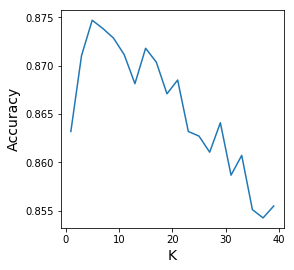

In [173]:
plt.plot(range(1,40,2), knn_scores,)
plt.xlabel('K', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
### Random Forest ###

In [199]:
# iterating to examine performance with different n_estimators or 'trees'
tree_scores = []
for i in range(1, 105, 8):
    rfc = ensemble.RandomForestClassifier(n_estimators=i, random_state=235)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    rfc.fit(X_train, y_train)
    results = rfc.score(X_test, y_test)
    tree_scores.append(results)
    print(results)

0.8173015873015873
0.9228571428571428
0.9364285714285714
0.9380952380952381
0.9408730158730159
0.9396825396825397
0.9396031746031746
0.9453968253968253
0.9397619047619048
0.9433333333333334
0.9437301587301588
0.9463492063492064
0.9465079365079365


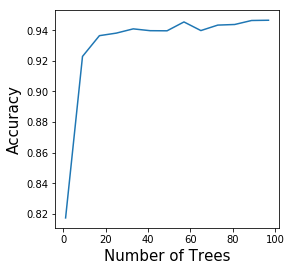

In [202]:
plt.plot(range(1,105,8), tree_scores)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Number of Trees', fontsize=15)
plt.show()

In [192]:
# Accuracy at different max_depths
depth_scores = []
for i in range(1, 80, 4):
    rfc = ensemble.RandomForestClassifier(n_estimators=30, max_depth = i, random_state=235)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    rfc.fit(X_train, y_train)
    results = rfc.score(X_test, y_test)
    depth_scores.append(results)
    print(results)

0.6019047619047619
0.8357142857142857
0.9160317460317461
0.9319047619047619
0.9408730158730159
0.9396825396825397
0.9399206349206349
0.9417460317460318
0.9416666666666667
0.9388095238095238
0.936984126984127
0.9405555555555556
0.9421428571428572
0.9404761904761905
0.9418253968253968
0.9419047619047619
0.9428571428571428
0.9392857142857143
0.9422222222222222
0.9397619047619048


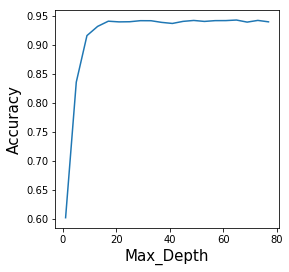

In [206]:
plt.plot(range(1,80,4), depth_scores)
plt.xlabel('Max_Depth', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

In [425]:
# Best random forest model
rfc = ensemble.RandomForestClassifier(n_estimators=300, max_depth=20)
result = cross_val_score(rfc,X,Y,cv=10)
print(result)
print('Average Accuracy with 10-fold cross validation: ', result.sum()/10)

[0.95268664 0.94671741 0.94835792 0.94929779 0.94357143 0.94403429
 0.94284353 0.94972599 0.95162059 0.94733079]
Average Accuracy with 10-fold cross validation:  0.9476186394816379


In [ ]:
rfc = ensemble.RandomForestClassifier(n_estimators=300, max_depth=20)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
confusion = pd.DataFrame()
confusion['Predictions'] = predictions
confusion['Actual'] = y_test

correct = []
for i in range(len(confusion)):
    if confusion.Actual.iloc[i] == confusion.Predictions.iloc[i]:
        correct.append(1)
    else:
        correct.append(0)
confusion['IsCorrect'] = correct
pd.crosstab(confusion.Predictions, confusion.Actual)

In [ ]:
### Support Vector Classifier ###

In [301]:
svcs_1 = []
Cs_1 = []
gammas_1 = []
Cs = [1, 10, 100, 1000, 10000, 1000000]
gammas = [.1, .01, .001, .0001, .00001, .000001]
for i in Cs:
    for j in gammas:
        svc = SVC(kernel='rbf', C=i, gamma=j)
        #Using  larger test size to improve runtime
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
        svc.fit(X_train, y_train)
        results = svc.score(X_test, y_test)
        svcs_1.append(results)
        Cs_1.append(i)
        gammas_1.append(j)
svcs1_df = pd.DataFrame()
svcs1_df['svc'] = svcs_1
svcs1_df['Cs'] = Cs_1
svcs1_df['gammas'] = gammas_1
svcs1_df = svcs1_df.pivot('Cs', 'gammas', 'svcs2')
sns.heatmap(svcs1_df, vmin = .90)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.ylabel('C', fontsize=14)
plt.xlabel('gamma', fontsize=14)
plt.title('Accuracy at Different Parameters', fontsize=14)
plt.show()

0.48
0.415
0.265
0.24
0.2225
0.1525
0.4925
0.6675
0.6275
0.35
0.22
0.2125
0.5175
0.68
0.7825
0.74
0.3275
0.25
0.5025
0.6525
0.7825
0.83
0.775
0.385
0.4625
0.6575
0.7775
0.83
0.8175
0.765
0.505
0.6825
0.7675
0.81
0.7875
0.845


In [ ]:
### Gradient Boost ###

In [ ]:
# Using the feature importance function of the gradient boosting classifier to play with dimension reduction
# Note: I ended up not cutting any features. For my purposes here I was trying to get the best submission to
# Kaggle, and all of my features contributed. If I was to improve this model I would spend a lot more time
# feature engineering...I need more features not less!
clf = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=2, loss = 'deviance')
X = normal_df.drop('label', 1)
Y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(11,11))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [207]:
# Iterating at different boosting stages and max_depths and comparing with a plot
gradient_num_trees = [[],[],[],[]]
for depth in range(2,6):
    for i in range(1, 160, 4):
        clf = ensemble.GradientBoostingClassifier(n_estimators=i, max_depth=depth, loss = 'deviance', random_state=123)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
        clf.fit(X_train, y_train)
        results = clf.score(X_test, y_test)
        gradient_num_trees[depth-2].append(results)

plt.plot(range(1,160,4), gradient_num_trees[0], label = 'Max Depth 2')
plt.plot(range(1,160,4), gradient_num_trees[1], label = 'Max Depth 3')
plt.plot(range(1,160,4), gradient_num_trees[2], label = 'Max Depth 4')
plt.plot(range(1,160,4), gradient_num_trees[3], label = 'Max Depth 5')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Number of Boosting Stages', fontsize=12)
plt.legend()
plt.title('Gradient Boost Classifier', fontsize=15)
plt.show()

0.7448412698412699
0.7684126984126984
0.7947619047619048
0.8208730158730159
0.8371428571428572
0.8475396825396826
0.8606349206349206
0.8711111111111111
0.8845238095238095
0.8859523809523809
0.8915873015873016
0.8942857142857142
0.8965873015873016
0.9044444444444445
0.9087301587301587
0.9042857142857142
0.9106349206349207
0.9152380952380952
0.9094444444444445
0.9132539682539682
0.9142063492063492
0.9161111111111111
0.9221428571428572
0.9217460317460318
0.9216666666666666
0.9242857142857143
0.9256349206349206
0.9277777777777778
0.9250793650793651
0.9283333333333333
0.9319047619047619
0.9291269841269841
0.928015873015873
0.9342857142857143
0.934047619047619
0.9334126984126984
0.9334126984126984
0.9318253968253968
0.932936507936508
0.9363492063492064


In [ ]:
# Max depth of 4 looked the best and I ramped up my n_estimators since this model is resistant to overfitting
# and got my best model overall!
clf = ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=4, loss = 'deviance')
X = normal_df
Y = df['label']
results = cross_val_score(clf, X, Y, cv=10)
print(results)
print(results.sum()/10)

In [ ]:
# Running the model on the test set and writing it to a csv to be submitted to Kaggle
clf = ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=4, loss = 'deviance')
X = df.drop('label', 1)
Y = df['label']
clf.fit(X,Y)
final_results = clf.predict(test_df)
submission2 = pd.DataFrame()
submission2['ImageId'] = range(1,28001)
submission2['Label'] = final_results
submission2.to_csv('/Users/jdobrow/Desktop/Data Science/Capstone 3 Files/submission2', index=False)

In [339]:
svcs_2 = []
Cs_2 = []
gammas_2 = []
Cs = [87, 88, 89]
gammas = [.0114, .0115, .0116]
for i in Cs:
    for j in gammas:
        svc2 = SVC(kernel='rbf', C=i, gamma=j)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=419)
        svc2.fit(X_train, y_train)
        results = svc2.score(X_test, y_test)
        svcs_2.append(results)
        Cs_2.append(i)
        gammas_2.append(j)
svcs2_df = pd.DataFrame()
svcs2_df['svc'] = svcs_2
svcs2_df['Cs'] = Cs_2
svcs2_df['gammas'] = gammas_2
svcs2_df = svcs2_df.pivot('Cs', 'gammas', 'svcs2')
sns.heatmap(svcs2_df, vmin = .948)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.ylabel('C', fontsize=14)
plt.xlabel('gamma', fontsize=14)
plt.title('Accuracy at Different Parameters', fontsize=14)
plt.show()

0.9495238095238095
0.9497619047619048
0.9494047619047619
0.9497023809523809
0.9494642857142858
0.9493452380952381
0.9495833333333333
0.9493452380952381
0.9492261904761905


In [409]:
# Best Model
X = normal_df
Y = df['label']
svc = SVC(kernel='rbf', C=87, gamma=0.0115)
result = cross_val_score(svc,X,Y,cv=10)
print(result)
print('Average Accuracy of 10-fold cross validation: ' + str(result.sum()/10))

[0.95601522 0.952902   0.95026178 0.95643894 0.95166667 0.94713027
 0.95332222 0.95115559 0.95448046 0.94971401]
Average Accuracy of 10-fold cross validation: 0.9523087151271549


In [ ]:
###

In [407]:
# Testing with chisquare if my pixel dummy features are significantly different from random chance.
for j in range(36):
    array=[]
    for i in range(10):
        array.append(len(pixel_df[(pixel_df['CondPix' + str(j)] == 1) & (pixel_df['label'] == i)]))
    print('Pixel '+str(j) + ':', stats.chisquare(array)[1])

Pixel 0: 2.3821579256422824e-45
Pixel 1: 0.0
Pixel 2: 0.0
Pixel 3: 0.0
Pixel 4: 0.0
Pixel 5: 0.0
Pixel 6: 0.0
Pixel 7: 0.0
Pixel 8: 0.0
Pixel 9: 0.0
Pixel 10: 0.0
Pixel 11: 0.0
Pixel 12: 0.0
Pixel 13: 0.0
Pixel 14: 0.0
Pixel 15: 0.0
Pixel 16: 0.0
Pixel 17: 0.0
Pixel 18: 0.0
Pixel 19: 3.319581206052907e-302
Pixel 20: 0.0
Pixel 21: 0.0
Pixel 22: 5.032777804517567e-97
Pixel 23: 0.0
Pixel 24: 0.0
Pixel 25: 0.0
Pixel 26: 0.0
Pixel 27: 0.0
Pixel 28: 0.0
Pixel 29: 0.0
Pixel 30: 2.0817359509243707e-165
Pixel 31: 0.0
Pixel 32: 0.0
Pixel 33: 0.0
Pixel 34: 0.0
Pixel 35: 6.641854078548399e-154
